# Problem Set 3

 - Due Date: Wednesday, April 9, 2025 
 - Time: 11:59pm
 - We will deduct 3 points (out of 10) for submissions that are late but less than 1 hour late.
 - Submissions that are more than 1 hour late give 0 points. 

__Upload your solutions to Canvas__ (if you experience any problems with Canvas, e-mail your solution to shsu@utexas.edu or priyansh@utexas.edu)

We will deduct points if the following requirements are not fulfilled:

 - hand in your solutions as a single Jupyter Notebook
 - answers (except for code) should be written in Markdown
 - use comments in the code sections to explain what you do
 - you can work in groups of three, but everyone has to hand in their own write-up of the solution
 - if you face a problem that you are not able to solve or you think your answer is wrong, explain why you think it is wrong and what you would expect.
 - make sure that figures are properly labelled: label the axes and add a legend.


Do not forget to add your name to the problem set solution.

## Problem 1

Assume the variable $ \{y_t\}_{t=0}^T $ is determined by the following equation:

$$
y_{t} = \lambda_1 y_{t-1} + \lambda_2 y_{t-2}, \quad t = 1, 2, \ldots, 25.
$$

The two initial values $ y_0 $ and $ y_{-1} $ are determined outside the model. In particular, we assume that

$y_0 = -1$ and $y_{-1} = 1$.

### (a)

Write this system of equations as a single matrix equation.

#### Answer to 1(a)
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 \\
-\lambda_{1} & 1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 \\
-\lambda_{2} & -\lambda_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0 \\
0 & -\lambda_{2} & -\lambda_{1} & 1 & 0 & \cdots & 0 & 0 & 0 \\
0 & 0 & -\lambda_{2} & -\lambda_{1} & 1 & \cdots & 0 & 0 & 0 \\
&&&& \vdots &&&& \\
0 & 0 & 0 & 0 & 0 & \cdots & -\lambda_{2} & -\lambda_{1} & 1
\end{bmatrix}
\begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
y_{3} \\
y_{4} \\
\vdots \\
y_{23} \\
y_{24} \\
y_{25}
\end{bmatrix}
=
\begin{bmatrix}
y_{0} \\
\lambda_{2} y_{-1} \\
0 \\
0 \\
0 \\
\vdots \\
0 \\
0 \\
0
\end{bmatrix}
$$


### (b)

Assume $\lambda_1 = 0.4$ and $\lambda_2 = -0.1$. 
Use Python to compute the whole sequence $ \{y_t\}_{t=0}^{25} $.

In [1]:
# answer to 1(b)
import numpy as np

def solve_matrix_equation(lambda_1, lambda_2, y0, y_minus_1, T):
    """
    Given lambda_1, lambda_2, y0, y_{-1}, and T,
    solve the matrix equation A @ y = b,
    where A is the coefficient matrix from part (a)
    and b is the RHS from part (a).

    Return
    ---
    y: np.array
        The solution to the matrix equation (y0, y2, ..., yT).
    A: np.array
        The coefficient matrix from part (a).
    b: np.array
        RHS from part (a).
    """
    # notice that the coef. matrix has all 1 in the diagonal,
    # -lambda_1 in the sub-diagonal, and -lambda_2 in the sub-sub-diagonal.
    # thus, we can construct the matrix by adding the diagonal, sub-diagonal,
    # and sub-sub-diagonal
    A = np.diag(np.ones(T + 1)) + \
        np.diag(-1 * lambda_1 * np.ones(T), k = -1) + \
        np.diag(-1 * lambda_2 * np.ones(T - 1), k = -2)
    # for simplicity, I am constructing the RHS as a vector, rather than 2 vectors
    b = np.zeros(T + 1)
    b[0] = y0
    b[1] = lambda_2 * y_minus_1
    # solve the matrix equation
    y_seq = np.linalg.inv(A) @ b
    return y_seq, A, b

# compute the whole sequence
y_seq, A, b = solve_matrix_equation(
    lambda_1 = 0.4,
    lambda_2 = -0.1,
    y0 = -1,
    y_minus_1 = 1,
    T = 25
)

### (c)

Plot the sequence $ \{y_t\}_{t=0}^{25} $.

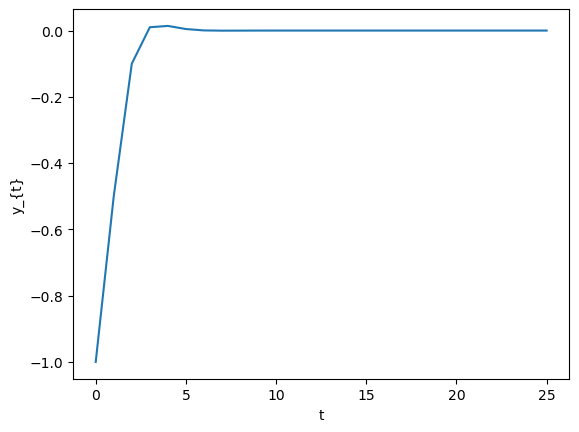

In [2]:
# answer to 1(c)
import matplotlib.pyplot as plt
plt.plot(y_seq)
plt.xlabel('t')
plt.ylabel('y_{t}')
plt.show()

## Problem 2

Consider the same setup as in Lecture 14 "Consumption Smoothing". But instead of assuming that the consumer does not leave any savings behind when she dies, we now assume that she wants to leave $a_{t+1} > 0$ behind for her children.
Note, that optimal consumption is still perfectly smoothed across all periods, i.e., $c_t = c_0$ for all $t = 0, 1, ..., T$.

### (a)

In Lecture 14, we derived the following equation:
$$
c_t = c_0  = \left(\sum_{t=0}^T R^{-t}\right)^{-1} (a_0 + h_0), \quad t= 0, 1, \ldots, T. \tag{4}
$$
How does this equation change when $a_{t+1} > 0$? 

#### Answer to 2(a)

Start with equation (1) from lecture 14:
    $$ a_{t + 1} = R(a_{t} + y_{t} - c_{t}), \quad t = 0, 1,\dots, T. $$
Solve for $a_{T}$:
    $$ a_{T} = R^{-1} a_{T + 1} + c_{T} - y_{T}. $$
Use $a_{T}$ to solve for $a_{T - 1}$:
    $$
        a_{T} = R(a_{T - 1} + y_{T - 1} - c_{T - 1}) = R^{-1} a_{T + 1} + c_{T} - y_{T}
        \iff a_{T - 1} = R^{-2} a_{T + 1} + R^{-1} (c_{T} - y_{T}) + c_{T -1 } - y_{T - 1}
        = R^{-2} a_{T + 1} + \sum_{t = 0}^{1} R^{-t} (c_{T - 1 + t} - y_{T - 1 + t}).
    $$
Use $a_{T - 1}$ to solve for $a_{T - 2}$:
    $$
        a_{T - 1} = R(a_{T - 2} + y_{T - 2} - c_{T - 2})
        = R^{-2} a_{T + 1} + \sum_{t = 0}^{1} R^{-t} (c_{T - 1 + t} - y_{T - 1 + t})
        \iff a_{T - 2} = R^{-3} a_{T + 1} + \sum_{t = 0}^{2} R^{-t} (c_{T - 2 + t} - y_{T - 2 + t}).
    $$
Thus, we know that:
    $$
        a_{T - K} = R^{-(K + 1)} a_{T + 1} + \sum_{t = 0}^{K} R^{-t} (c_{T - K + t} - y_{T - K + t}).
    $$
Use the inital condition $a_{0}$, we get:
    $$
        a_{0} = R^{-(T + 1)} a_{T + 1} + \sum_{t = 0}^{T} R^{-t} (c_{t} - y_{t})
        \iff a_{0} - R^{-(T + 1)} a_{T + 1} = \sum_{t = 0}^{T} R^{-t} c_{t} - \sum_{t = 0}^{T} R^{-t} y_{t}.
    $$
Let $h_{0} = \sum_{t = 0}^{T} R^{-t} y_{t}$ and impose consumption smoothing $c_{t} = c_{t}$ for $t = 0, 1, \dots, T$:
    $$
        a_{0} - R^{-(T + 1)} a_{T + 1} = c_{0} \sum_{t = 0}^{T} R^{-t} - h_{0}
        \iff c_{t} = c_{0} = \left( \sum_{t = 0}^{T} R^{-t} \right)^{-1} (a_{0} + h_{0} - R^{-(T + 1)} a_{T + 1}), \quad t = 0, 1, \dots, T.
    $$
This is the revised equation 4 when $a_{T + 1} > 0$.
Notice that when $a_{T + 1} = 0$ we have the recover equation 4.

### (b) 
Set $a_{t+1} = 1$, $a_0 = 0$, $R = 1.05$, $g_1 = 1$, $g_2 = 0.5$, $\beta = R^{-1}$ and $T = 65$. 

Assume the consumer receives an income of 1 in the first 20 periods, an income of 1.5 in the next 20 periods, and then an income of 0. Compute the optimal consumption sequence $\{c_t\}_{t+0}^T$ as well as the optimal sequence of financial wealth $\{a_t\}_{t+0}^{T+1}$.

In [3]:
# answer to 2(b)
import numpy as np
from collections import namedtuple

# define the namedtuple like in lecture 14
ConsumptionSmoothing = namedtuple("ConsumptionSmoothing",
                        ["R", "g1", "g2", "β_seq", "T"])

# define the function to create the model
def create_consumption_smoothing_model(R = 1.05, g1 = 1, g2 = 1/2, T = 65):
    β = 1 / R
    β_seq = np.array([β ** i for i in range(T + 1)])
    return ConsumptionSmoothing(R, g1, g2, β_seq, T)

# create a function to compute the optimal consumption and asset sequence
# this function is based on the lecture note with the introduction of
# aTplus1 parameter and the pv_terminal term
def compute_optimal(model, a0, aTplus1, y_seq):
    R, T = model.R, model.T

    # non-financial wealth
    h0 = model.β_seq @ y_seq # since β = 1/R

    # compute present value of the terminal asset
    pv_terminal = (1 / R) ** (T + 1) * aTplus1

    # c0
    c0 = (1 - 1 / R) / (1 - (1 / R) ** (T + 1)) * (a0 + h0 - pv_terminal)
    c_seq = c0 * np.ones(T + 1)

    # verify
    A = np.diag(-R * np.ones(T), k = -1) + np.eye(T + 1)
    b = y_seq - c_seq
    b[0] = b[0] + a0

    # compute asset sequence
    a_seq = R * np.linalg.inv(A) @ b
    a_seq = np.concatenate([[a0], a_seq])

    return c_seq, a_seq, h0

# set the boundary conditions
a0 = 0
a1 = 2

# create income process
y_seq = np.concatenate([np.ones(20), 1.5 * np.ones(20), np.zeros(26)])

# run the code
cs_model = create_consumption_smoothing_model()
c_seq, a_seq, _ = compute_optimal(cs_model, a0, a1, y_seq)

# verify the the enforcement of the boundary condition
assert np.abs(a_seq[-1] - a1) < 1e-12, print(f'Abs. Diff: {np.abs(a_seq[-1] - a1)}')

### (c)
Now do the same as in question **(b)** but for $a_{t+1} = 0$. 
Compare your results from question **(b)** with the case in which $a_{t+1} = 0$ graphically. Explain briefly why we see these differences.

Text(0, 0.5, 'c_{t}')

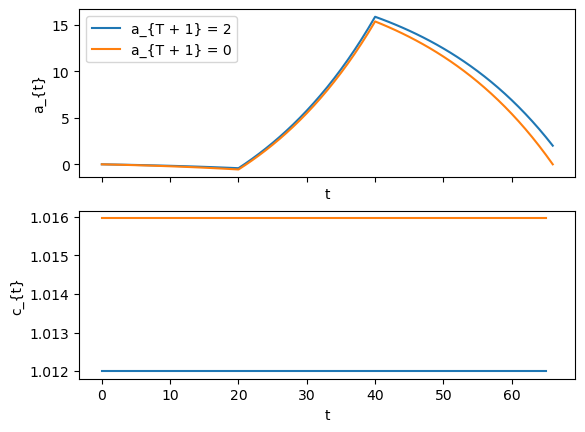

In [4]:
# answer to 2(c)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

# plot the sequences from part (b)
ax1.plot(a_seq, label = 'a_{T + 1} = 2')
ax2.plot(c_seq, label = 'a_{T + 1} = 2')

# compute new sequences
c_seq2, a_seq2, _ = compute_optimal(cs_model, a0, 0, y_seq)

# plot the new sequences
ax1.plot(a_seq2, label = 'a_{T + 1} = 0')
ax2.plot(c_seq2, label = 'a_{T + 1} = 0')
ax1.legend()
ax1.set_xlabel('t')
ax1.set_ylabel('a_{t}')
ax2.set_xlabel('t')
ax2.set_ylabel('c_{t}')

# The new financial wealth sequence has a lower level of financial wealth
# each time period due to a higher consumption at each period.
# Since the terminal asset is 0, the agent will consume more
# at each period to reach the terminal condition. This results in a lower
# financial wealth at each period.


The graphs show how the optimal consumption and financial wealth sequences differ when the consumer's wealth at the, $a_{T+1}$, is 2 versus when it is 0. When $a_{T+1} = 2$, the consumer has some buffer of wealth, allowing them to smooth consumption more evenly over their life, especially during periods of low income. As a result, the consumption sequence is more stable, and financial wealth remains positive at the end of life. In contrast, when $a_{T+1} = 0$, the consumer must deplete all their wealth by the end of their life. This forces them to consume more in the earlier periods, particularly when income is higher, and their wealth gradually decreases to zero. The key difference is that the wealth buffer in the first case enables more consistent consumption, while the absence of it in the second case results in greater consumption early on and faster depletion of wealth.

### (d)
How do your results from question **(b)** change when $R = 1.1$? 
(As before, we still impose $\beta = R^{-1}$.) 

Text(0, 0.5, 'c_{t}')

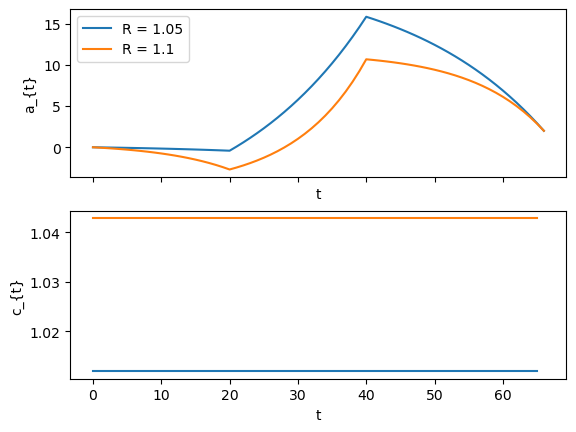

In [5]:
# answer to 2(d)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

# plot the sequences from part (b)
ax1.plot(a_seq, label = 'R = 1.05')
ax2.plot(c_seq, label = 'R = 1.05')

# compute new sequences
c_seq3, a_seq3, _ = compute_optimal(create_consumption_smoothing_model(R = 1.1), a0, a1, y_seq)

# plot the new financial wealth sequence
ax1.plot(a_seq3, label = 'R = 1.1')
ax2.plot(c_seq3, label = 'R = 1.1')
ax1.legend()
ax1.set_xlabel('t')
ax1.set_ylabel('a_{t}')
ax2.set_xlabel('t')
ax2.set_ylabel('c_{t}')


When $R = 1.1$ and $\beta = R^{-1}$, the results from question b do change. A higher $R$, or higher interest rate, increases the discount factor on future consumption. This makes the consumer value future consumption less in comparison to current consumption. As a result, the optimal consumption path shifts, with the consumer consuming more in the earlier periods and saving less for the future compared to the case with $R = 1.05$. The consumer's wealth will also reflect this change, as they accumulate less wealth during their working years, given the higher discounting of future wealth. This adjustment in both consumption and wealth sequences is due to the higher rate of time preference, where future consumption is less valuable relative to present consumption. 
